# Pràctica 1:

Nom dels alumnes del grup:

> Recordeu que, tot i que la pràctica es fa en parelles, els dos membres del grup han de lliurar al campus virtual aquest notebook.

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.
+ **pyshp** és una biblioteca de Python que es fa servir per a llegir i escriure arxius en el format de fitxers de forma (shapefiles). El format de fitxers de forma és un format estàndard en geoinformàtica i geodèsia per a emmagatzemar i intercanviar dades geoespacials, com ara punts, línies i polígons, juntament amb les seves propietats associades.
+ **shapely** és una biblioteca de Python que es fa servir per a realitzar operacions geomètriques i anàlisi espacial amb objectes geoespacials. Aquesta biblioteca és especialment útil per a treballar amb geometria plana, com ara punts, línies i polígons, i permet realitzar una àmplia gamma d'operacions, com ara interseccions, unions, àrees, longituds i moltes altres.
+ **descartes** és una biblioteca de tercers que es fa servir per a la visualització de gràfics geoespacials.

In [1]:
%%capture
! pip install pyarrow
! pip install pyshp==2.1.3
! pip install shapely==1.7.1
! pip install pandas==1.5.3
! pip install numpy==1.22
! pip install descartes==1.1.0

In [2]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [3]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [4]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [5]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, com a mínim cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, podem considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [6]:
# carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# podeu treballarem amb una mostra uniforme de les dades (1 fila de cada 1000).

def load_table(year, month, sampling = 100):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(76967, 9)

In [7]:
test.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7695700,2019-01-30 22:40:39,2019-01-30 22:41:55,NaN,0.17,256,256,0,39.95,43.0
7695800,2019-01-31 06:58:00,2019-01-31 07:44:00,NaN,17.57,108,56,0,77.45,81.0
7695900,2019-01-31 07:46:00,2019-01-31 08:37:00,NaN,10.85,91,231,0,37.19,46.5
7696000,2019-01-31 09:00:00,2019-01-31 09:45:00,NaN,4.11,162,231,0,35.95,39.5
7696100,2019-01-31 11:18:35,2019-01-31 11:41:41,NaN,4.52,244,75,0,29.45,32.5
7696200,2019-01-31 14:01:00,2019-01-31 15:08:00,NaN,16.32,36,21,0,59.15,62.7
7696300,2019-01-31 15:35:00,2019-01-31 15:55:00,NaN,4.96,18,220,0,26.31,32.5
7696400,2019-01-31 17:11:00,2019-01-31 18:05:00,NaN,14.78,107,130,0,50.69,60.0
7696500,2019-01-31 18:33:00,2019-01-31 18:58:00,NaN,8.80,107,69,0,39.45,43.0
7696600,2019-01-31 23:31:07,2019-01-31 23:51:40,NaN,9.17,140,47,0,43.45,46.5


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, explora els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [8]:
def clean_data(data, year, month):
    """
    Funció que neteja (una mostra de) les dades per un mes donat.
    """

    # Filtramos los datos nulos
    data = data[data.notnull()]

    # Filtramos las salidas y llegadas incoherentes
    data = data[data['tpep_dropoff_datetime'] > data['tpep_pickup_datetime']]

    # Filtramos los viajes con año incorrecto
    data = data[(data['tpep_pickup_datetime'].dt.year == year) & (data['tpep_dropoff_datetime'].dt.year == year)]

    # Filtramos los viajes con mes incorrecto
    data = data[(data['tpep_pickup_datetime'].dt.month == month) & (data['tpep_dropoff_datetime'].dt.month == month)]

    # Filtramos los viajes con pasajeros incoherentes
    data = data[data['passenger_count'].isin([1,2,3,4,5])]

    # Filtramos los viajes con un pago inferior a la tarifa mínima
    data = data[(data['fare_amount'] > 3) & (data['total_amount'] > 3)]

    # Filtramos los viajes donde lo pagado es inferior a la tarifa (en dolares)
    data = data[data['fare_amount'] <= data['total_amount']]

    # Filtramos los viajes con una distancia infima y extremadamente grande (en millas)
    data = data[(data['trip_distance'] >= 0.6) & (data['trip_distance'] <= 100)]

    # Filtramos los tipos de pago invalidos
    data = data[data['payment_type'].isin([1,2,3,4,5,6])]

    # Filtramos los viajes con velocidades por encima de las legales(en millas por hora)
    times = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600
    speeds = data['trip_distance'] / times
    data = data[(speeds <= 55) & (speeds >= 5)]

    return data

In [9]:
test = load_table(2019, 1)
test2 = clean_data(test, 2019, 1)
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63531 entries, 0 to 7667900
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   63531 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  63531 non-null  datetime64[ns]
 2   passenger_count        63531 non-null  float64       
 3   trip_distance          63531 non-null  float64       
 4   PULocationID           63531 non-null  int64         
 5   DOLocationID           63531 non-null  int64         
 6   payment_type           63531 non-null  int64         
 7   fare_amount            63531 non-null  float64       
 8   total_amount           63531 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 4.8 MB


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem trasnformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

In [10]:
MILLA_A_QUILOMETRE = 1.60934
DOLAR_A_EURO = 0.95
SEGONS_A_HORA = 3600

def post_processing(data):
    """
    Funció on implementar qualsevol tipus de postprocessament necessari.
    """

    # Evita modificar los datos originales
    new_data = data.copy()

    # Pasa valores a unidades europeas
    new_data['trip_distance'] = round(data['trip_distance'] * MILLA_A_QUILOMETRE, 2)
    new_data['fare_amount'], new_data['total_amount'] = round(data['fare_amount'] * DOLAR_A_EURO, 2), round(new_data['total_amount'] * DOLAR_A_EURO, 2)

    # Añade columnas útiles
    new_data['year'] = new_data['tpep_pickup_datetime'].dt.year
    new_data['month'] = new_data['tpep_pickup_datetime'].dt.month
    new_data['pickup_hour'] = new_data['tpep_pickup_datetime'].dt.hour
    new_data['dropoff_hour'] = new_data['tpep_dropoff_datetime'].dt.hour
    new_data['pickup_day'] = new_data['tpep_pickup_datetime'].dt.day
    new_data['dropoff_day'] = new_data['tpep_dropoff_datetime'].dt.day
    new_data['pickup_week'] = new_data['tpep_pickup_datetime'].dt.isocalendar().week
    new_data['dropoff_week'] = new_data['tpep_dropoff_datetime'].dt.isocalendar().week
    new_data['trip_duration'] = round((new_data['tpep_dropoff_datetime'] - new_data['tpep_pickup_datetime']).dt.total_seconds() / SEGONS_A_HORA, 2)
    new_data['speed'] = round(new_data['trip_distance'] / new_data['trip_duration'], 2)

    return new_data

In [11]:
test3 = post_processing(test2)
test3.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,month,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_week,dropoff_week,trip_duration,speed
7667100,2019-01-31 23:23:36,2019-01-31 23:35:43,1.0,3.38,264,140,1,9.50,12.16,2019,1,23,23,31,31,5,5,0.20,16.90
7667300,2019-01-31 23:52:01,2019-01-31 23:57:25,1.0,1.93,142,239,1,6.18,8.89,2019,1,23,23,31,31,5,5,0.09,21.44
7667400,2019-01-31 15:31:51,2019-01-31 15:43:41,3.0,2.61,186,161,1,9.02,12.82,2019,1,15,15,31,31,5,5,0.20,13.05
7667600,2019-01-31 23:13:39,2019-01-31 23:19:36,1.0,3.52,142,151,1,7.60,10.60,2019,1,23,23,31,31,5,5,0.10,35.20
7667900,2019-01-31 23:32:17,2019-01-31 23:47:35,2.0,4.06,164,113,1,10.92,13.30,2019,1,23,23,31,31,5,5,0.26,15.62


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [12]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)])
df = post_processing(df)

df.tail()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,month,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_week,dropoff_week,trip_duration,speed
3111500,2021-12-31 23:37:33,2021-12-31 23:53:36,1.0,14.16,138,141,1,24.70,54.72,2021,12,23,23,31,31,52,52,0.27,52.44
3111600,2021-12-31 23:24:02,2021-12-31 23:35:34,2.0,1.61,161,237,1,8.07,16.43,2021,12,23,23,31,31,52,52,0.19,8.47
3111700,2021-12-31 23:11:50,2021-12-31 23:36:38,1.0,23.24,132,198,1,38.00,50.23,2021,12,23,23,31,31,52,52,0.41,56.68
3111800,2021-12-31 23:28:57,2021-12-31 23:35:36,1.0,1.95,237,229,1,6.65,12.35,2021,12,23,23,31,31,52,52,0.11,17.73
3111900,2021-12-31 23:28:54,2021-12-31 23:42:18,2.0,4.18,151,141,1,10.92,17.44,2021,12,23,23,31,31,52,52,0.22,19.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144079 entries, 0 to 3111900
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   tpep_pickup_datetime   1144079 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  1144079 non-null  datetime64[ns]
 2   passenger_count        1144079 non-null  float64       
 3   trip_distance          1144079 non-null  float64       
 4   PULocationID           1144079 non-null  int64         
 5   DOLocationID           1144079 non-null  int64         
 6   payment_type           1144079 non-null  int64         
 7   fare_amount            1144079 non-null  float64       
 8   total_amount           1144079 non-null  float64       
 9   year                   1144079 non-null  int64         
 10  month                  1144079 non-null  int64         
 11  pickup_hour            1144079 non-null  int64         
 12  dropoff_hour           11440

## 3. Visualització de dades anuals

Començarem per obtenir una resposta quantitativa a la pregunta **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [14]:
def bar_plot(df, column, xlabel, ylabel, title, labels):
    """
    Funció que crea una figura de barres a partir del dataframe i
    la columna que conté la informació.
    """

    data = df.groupby(column) # Agrupem les dades per any
    heights = data.size().values # Extraiem el recompte de les dades agrupades

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.bar(labels, heights, align='center', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

+ Visualitza el nombre de viatges de cada any.

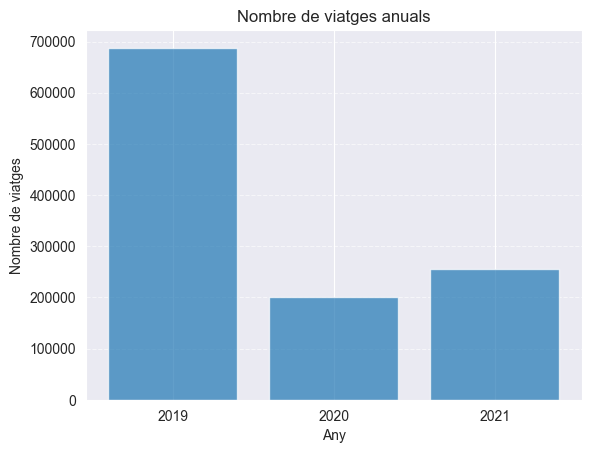

In [15]:
# AQUÍ EL TEU CODI
labels = [str(i) for i in YEARS]
bar_plot(df, 'year', 'Any', 'Nombre de viatges', 'Nombre de viatges anuals', labels)

**S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**

Com era d'esperar, la quantitat de viatges anuals va disminuir molt respecte l'any anterior al covid (2019), pero pensavem que a l'any 2021 augmentaria mes, pero no va ser aixi, ja que va augmentar molt poc respecte l'any 2020

+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

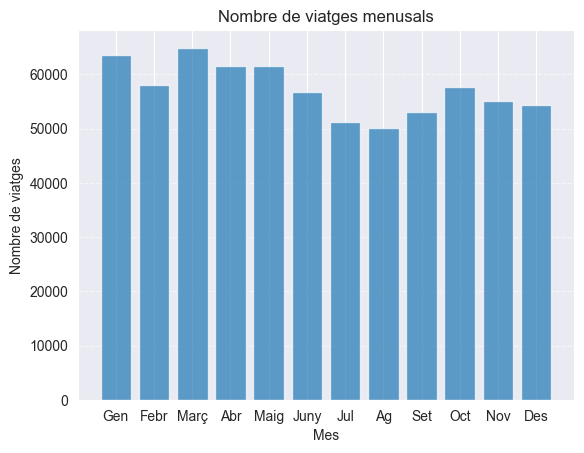

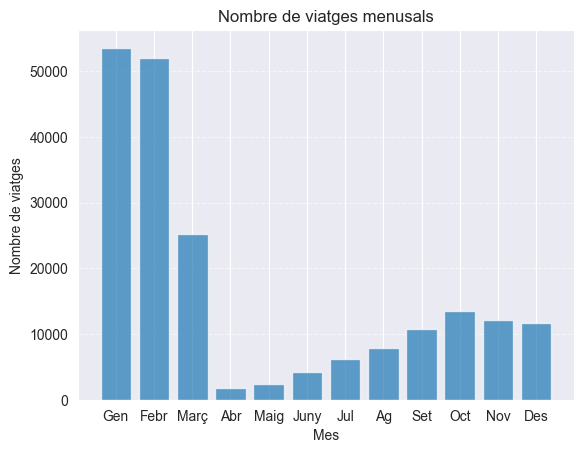

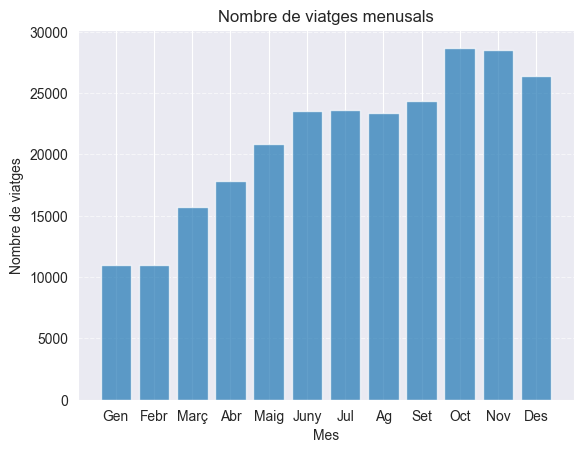

In [16]:
# AQUÍ EL TEU CODI
labels = ['Gen', 'Febr', 'Març', 'Abr', 'Maig', 'Juny', 'Jul', 'Ag', 'Set', 'Oct', 'Nov', 'Des']
for year in YEARS:
    data = df[df['year'] == year]
    bar_plot(data, 'month', 'Mes', 'Nombre de viatges', 'Nombre de viatges menusals', labels)

+ És el comportament que esperàveu? Per què?

> Resposta:
El comportament que ens esperavem era just el que ha resultat, a l'any 2019 tots els mesos amb un gran nombre de viatges i a partir del març del 2020 una baixa de viatges important (a causa del confinament degut a la COVID-19), pero poc a poc una recuperació a mitjanç del 2021 pero sense arribar als nombres del 2019
> Bloque con sangría



+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % (utilitzeu el paràmetre *norm = True*).

In [17]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm=False):
    """
    Funció que visualitza quants passatgers hi ha per taxi i per any.
    """
    plt.figure(figsize=(15, 5))  # Defineix la mida de la figura

    # Si es vol normalitzar, calcula el recompte de passatgers com a percentatge
    if norm:
        print(df.groupby(['year', 'passenger_count']))
        total_passengers = df.groupby(['year', 'passenger_count']).size().unstack().T
        total_passengers = total_passengers / total_passengers.sum(axis=0)

    # Si no es vol normalitzar, calcula el recompte de passatgers
    else:
        print(df.groupby(['year', 'passenger_count']).size().unstack().T)
        total_passengers = df.groupby(['year', 'passenger_count']).size().unstack().T

    # Crea una figura amb tres subfigures (una per any)
    print(total_passengers.columns)
    print(df['year'].min())
    for year in total_passengers.columns:
        plt.subplot(1, 3, year - df['year'].min() + 1)
        sns.barplot(x=total_passengers.index, y=total_passengers[year])
        plt.title(f'Any {year}')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.ylim(ylim)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

year               2019    2020    2021
passenger_count                        
1.0              502289  153680  193491
2.0              110475   29761   39954
3.0               30968    7822   10662
4.0               14692    3478    4209
5.0               29430    6712    6456
Int64Index([2019, 2020, 2021], dtype='int64', name='year')
2019


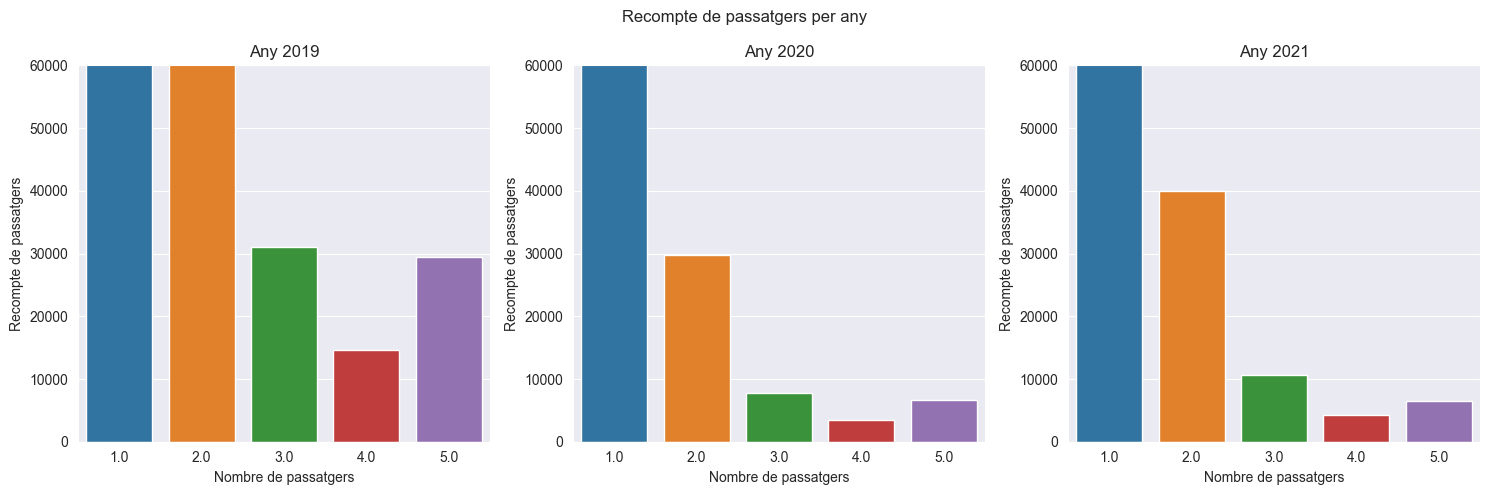

In [18]:
passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

Int64Index([2019, 2020, 2021], dtype='int64', name='year')
2019


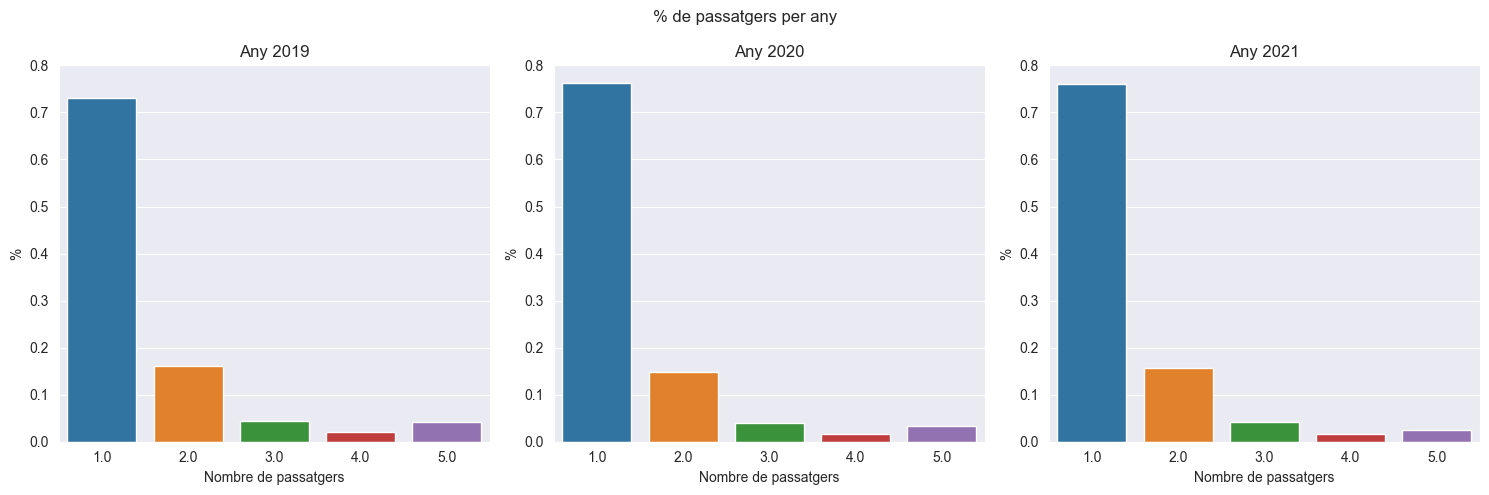

In [19]:
passengers_taxi_year(df,
                     (0, 0.8),
                     'Nombre de passatgers',
                     '%',
                     '% de passatgers per any',
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?

> Resposta:

+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, etc.).

In [20]:
# AQUÍ EL TEU CODI
pass

+ Descriviu els resultats quantitatius que heu obtingut.

> Resposta:

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

In [21]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Funció que visualitza els viatges per diferents agregacions de dades
    """

    # Crear una copia del DataFrame original para no modificar los datos originales
    df_copy = df.copy()

    # Crear columnas auxiliares para hora, día de la semana y número de semana del año
    df_copy['pickup_hour'] = df_copy['tpep_pickup_datetime'].dt.hour
    df_copy['dropoff_hour'] = df_copy['tpep_dropoff_datetime'].dt.hour
    df_copy['pickup_day'] = df_copy['tpep_pickup_datetime'].dt.dayofweek
    df_copy['dropoff_day'] = df_copy['tpep_dropoff_datetime'].dt.dayofweek
    df_copy['pickup_week'] = df_copy['tpep_pickup_datetime'].dt.isocalendar().week
    df_copy['dropoff_week'] = df_copy['tpep_dropoff_datetime'].dt.isocalendar().week

    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterar por cada año en el conjunto de datos
    for year in df_copy['tpep_pickup_datetime'].dt.year.unique():
        # Filtrar las datos por el año actual
        data_year = df_copy[df_copy['tpep_pickup_datetime'].dt.year == year]

        # Agrupar las datos según las columnas especificadas
        grouped_data = data_year.groupby(columns).size().reset_index(name='count')

        # Crear un gráfico de línea para el año actual
        ax.plot(grouped_data[columns[0]], grouped_data['count'],linestyle='--', marker='o', label=f'Año {year}')

    # Configurar etiquetas y título
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Mostrar leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

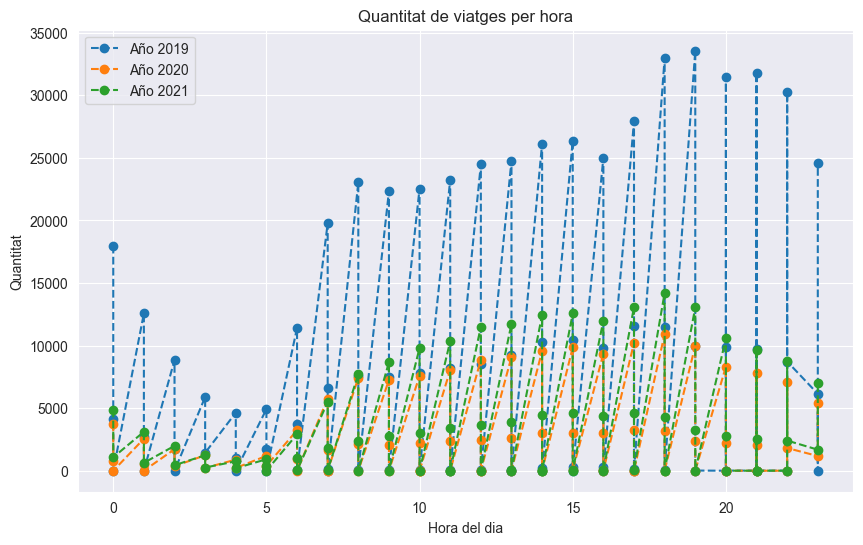

In [22]:
visualize_trips(df,
                ['pickup_hour', 'dropoff_hour'],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

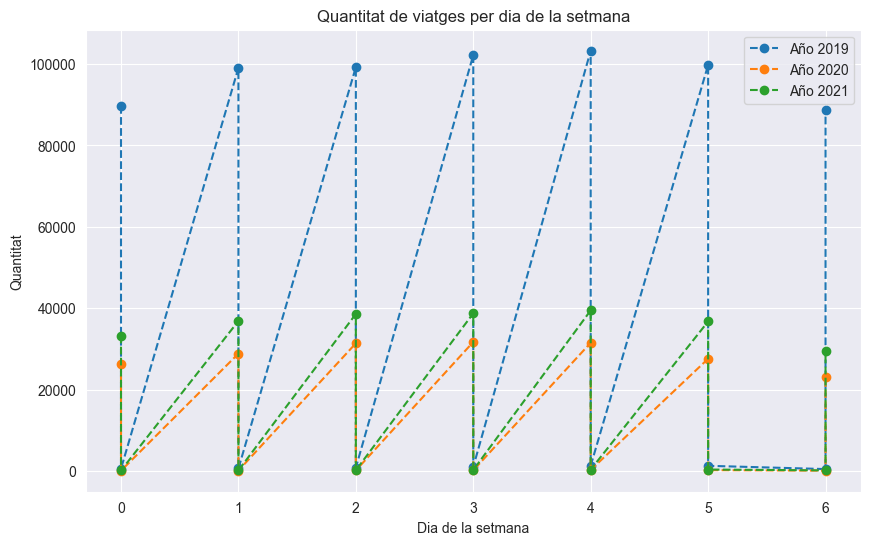

In [23]:

visualize_trips(df,
                ['pickup_day', 'dropoff_day'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

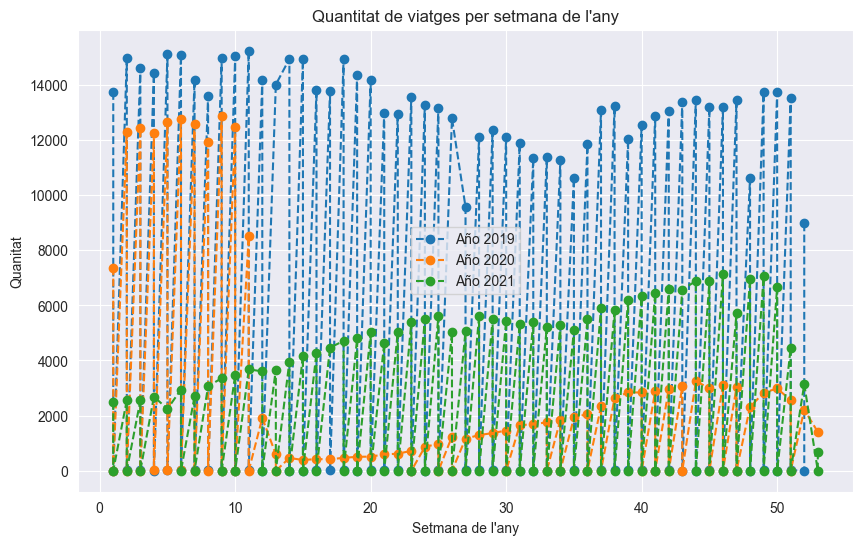

In [24]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta: Als dos primers gràfics (viatgers per hora i per dies) podem observar que als anys 2020 i 2021 hi ha molts menys viatges que l'any 2019. Respecte a l'últim gràfic, es pot veure quin va ser el començament de la pandèmia, aproximadament a la setmana 11 on es veu una gran baixada dels viatgers.
Com tots sabem, el motiu d'aquesta baixada dels viatges va ser la pandèmia de COVID-19.

## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

In [25]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Funció que crea un histograma a partir de la informació que conté la columna del dataframe
    """

    # Configura la figura on es visualitzara l'histograma
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xlim)

    data = [group[column].values for _, group in df.groupby('year')]

    plt.hist(data, histtype='bar', label=YEARS, bins=50)

    plt.legend()
    plt.show()

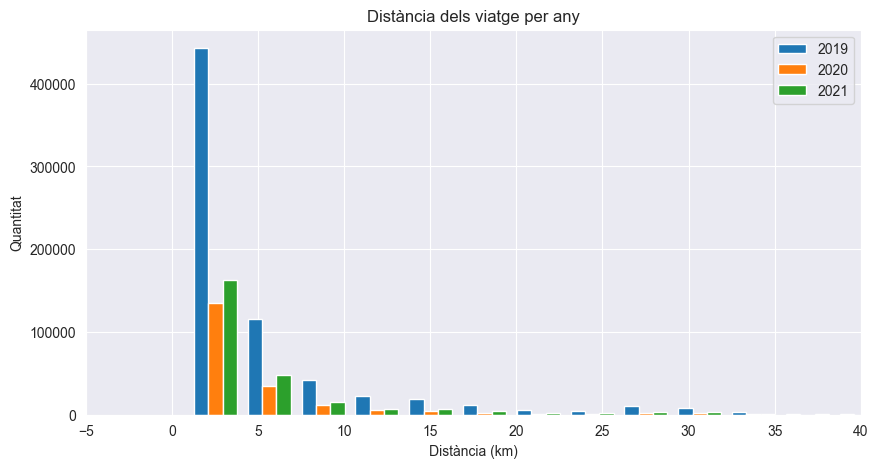

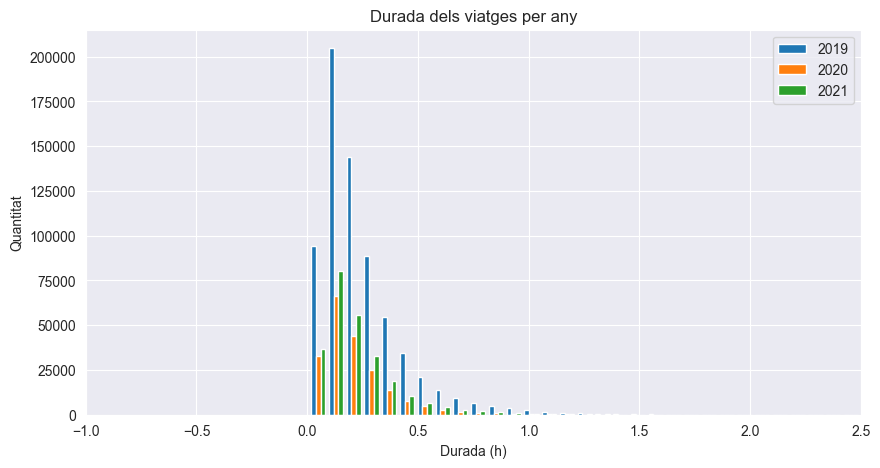

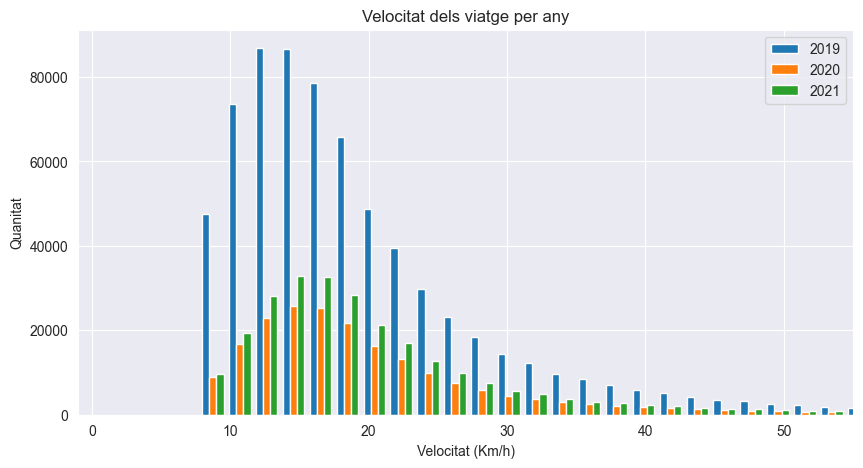

In [26]:
visualize_histograms(df, 'trip_distance', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 40))

visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-1, 2.5) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (-1, 55) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> Resposta:

* I a la velocitat dels taxis?

> Resposta:

## 6. Visualització de les localitzacions dels viatges

In [27]:
column_names = df.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'year', 'month', 'pickup_hour', 'dropoff_hour', 'pickup_day', 'dropoff_day', 'pickup_week', 'dropoff_week', 'trip_duration', 'speed']


Només tenim la ID d'una localització, per tant, necessitem aconseguir la latitud i la longitud.

La mateixa pàgina dels taxis ens dóna el fitxer *taxi_zones.zip*, però primer cal que convertim les dades de coordenades amb format WGS84.

Podem utilitzar aquesta web: https://mygeodata.cloud/

In [40]:
from utils import get_lat_lon, draw_region_map, draw_zone_map

In [41]:
sf = shapefile.Reader('data/geodata/taxi_zones.shp')

fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [42]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf, shp_dic).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,-74.171533,40.689483
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,-73.822478,40.610824
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,-73.844953,40.865747
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,-73.977725,40.724137
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,-74.187558,40.550664


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

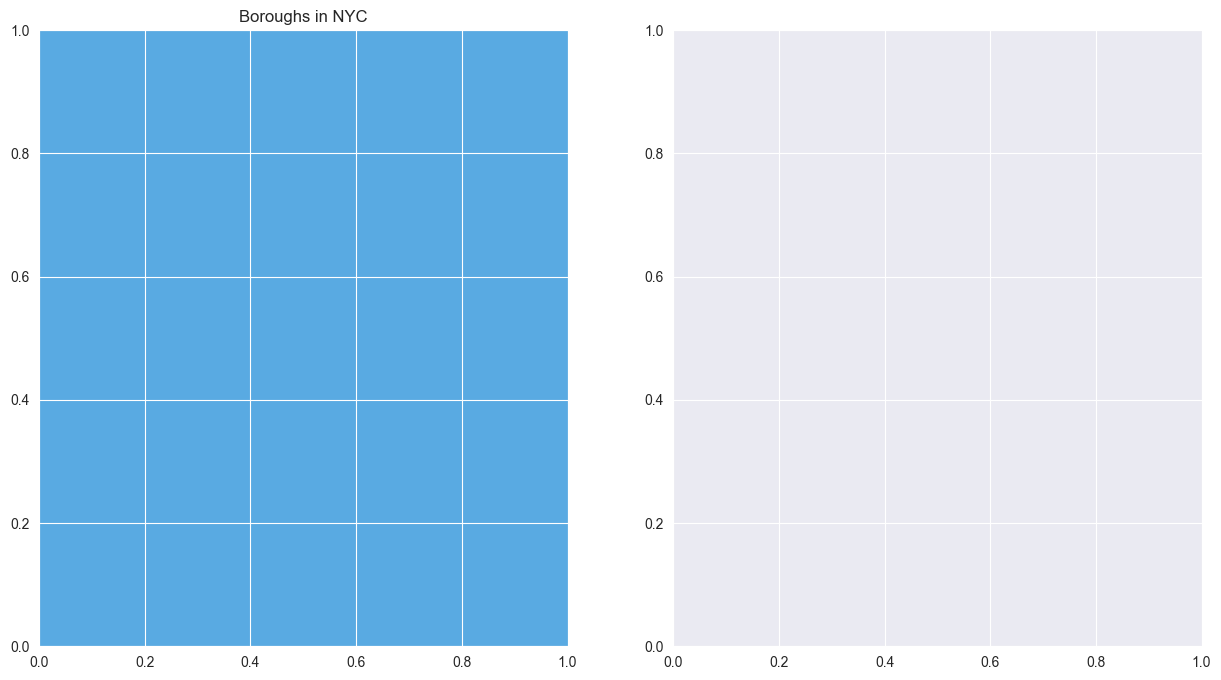

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf, shp_dic)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, shp_dic)

### Exercici F

+ Ara teniu dos dataframe que necessitem unir. Utilitza la funció *merge* de Pandas per crear un nou dataframe (conserva el dataframe `df`), anomenat `merge`, que contingui la longitud i latitud (del punt de recollida i del punt de destí) a cada fila.

In [ ]:
# AQUÍ EL TEU CODI
merge = pd.merge(df, df_loc, left_on='PULocationID', right_on='LocationID', how='inner')

In [ ]:
merge.shape

In [ ]:
merge.head()

## 7. Quines zones de NY tenen més recollides i quines zones tenen més arribades?

En aquest apartat volem conèixer i visualitzar les zones on els taxis són més utilitzats.

El primer pas és ordenar i guardar en una variable els llocs més comuns en la recollida i el destí.

### Exercici G
+  Escriu una funció `show_top_n` que imprimeix els 5 llocs més freqüents de recollida i els 5 llocs més freqüents d'arribada, per cada any.

In [ ]:
n_top = 5
def show_top_n(df, column, df_loc, n_top = n_top):
    """
    Funció que mostra els llocs més usuals per any
    """
    # AQUÍ EL TEU CODI
    pass

In [ ]:
show_top_n(top_pu, 'PULocationID', df_loc)

In [ ]:
show_top_n(top_do, 'DOLocationID', df_loc)

Visualitzem amb un mapa de calor quines són les zones més recurrents.

In [ ]:
for year in YEARS:

    PUcount = {k:v for k, v in top_do[top_do.year == year][['DOLocationID', 'trip_distance']].values}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"Zones with most pickups - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"Zones with most drop-offs - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])

+ Per què creieu que la zona de Manhattan té més quantitat de viatges?

> Resposta:

## 8. Hospitals

Com ha canviat la destinació dels viatges? Hi ha més viatges a les zones on hi ha grans hospitals?

A la següent cel·la us donem la creació manual d'un DataFrame amb la localització més important dels hospitals de Nova York.

In [ ]:
hospitals = [('New York’s Presbyterian Lower Manhattan Hospital, NYC, NY, USA', '40.710255', '-74.005058'),
('Manhattan Gastroenterology, NYC, NY, USA', '40.778259', '-73.958092'),
('Stem Cell Therapy Hospital, NYC, NY, USA', '40.601517', '-73.961067'),
('Park Avenue Smiles, Yonkers, NYC, NY, USA', '40.945873', '-73.890671'),
('Cosmetic Dentistry Center, NYC, NY, USA', '40.629234', '-74.026077'),
('Envy Smile Dental Spa, Brooklyn, NYC, NY, USA', '40.607059', '-73.960144'),
('VIVA EVE, Forest Hills, NYC, NY, USA', '40.734291', '-73.849434'),
('Forest Hills Medical Services, Queens, NYC, NY, USA', '40.734310', '-73.849510'),
('Professional Gynecological Services, Brooklyn, NY, NY, USA', '40.689747', '-73.982346'),
('Manhattan Womens Health & Wellness, New York, NY, USA', '40.741997', '-73.986107'),
('Brooklyn Abortion Clinic, Brooklyn, NY, New York, USA', '40.689743', '-73.982368'),
('Brooklyn GYN Place, Brooklyn, NY, USA', '40.692696', '-73.993584'),
('Americas Holistic Doctor, NYC, NY, USA', '40.742531', '-73.985489'),
('NJS Physical Medicine & Rehabilitation, Brooklyn, NY, USA', '40.641621', '-73.956734'),
('DHD Medical, Brooklyn New York, USA', '40.625568', '-73.918320'),
('Workers Compensation Doctor, New York, NY, USA', '40.652225', '-74.006104'),]

hospitals = pd.DataFrame(hospitals, columns = ['Place Name', 'Latitude', 'Longitude'])
hospitals['Latitude'] = hospitals['Latitude'].astype(float)
hospitals['Longitude'] = hospitals['Longitude'].astype(float)
hospitals.head()

### Exercici H

+ Utilitza la latitud i longitud de cada hospital i la de les zones del dataframe *merge* per veure la relació entre la distribució dels hospitals i la dels viatges. Per fer-ho utilitza els gràfics de dispersió. Recorda que s'entendrà millor si els punts són transparents (paràmetre *alpha*).

+ Després repeteix el mateix gràfic però separat per any.

In [ ]:
def scatter_locations(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    # AQUÍ EL TEU CODI
    pass

In [ ]:
scatter_locations(merge, hospitals)

In [ ]:
def scatter_locations_per_year(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    # AQUÍ EL TEU CODI
    pass

In [ ]:
scatter_locations_per_year(merge, hospitals)

* Veus algun comportament interessant per comentar?
> Resposta: